In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_excel('../shared_data_read_only/Data/AfriKids/InternalData/Project_Surveys/DASI BASELINE FINAL DATA PRESENTATION Without Slicer Error 13-06-19.xlsx', sheet_name='DASI BASELINE FINAL DATA')
df['Community holding the school to account/Evaluate the level of participation by community in school planning']

0     POOR – Community members are passive and do no...
1     POOR – Community members are passive and do no...
2     FAIR- When invited, some community members par...
3     GOOD – Most community members willing particip...
4     GOOD – Most community members willing particip...
                            ...                        
75    GOOD – Most community members willing particip...
76    FAIR- When invited, some community members par...
77    GOOD – Most community members willing particip...
78    GOOD – Most community members willing particip...
79    GOOD – Most community members willing particip...
Name: Community holding the school to account/Evaluate the level of participation by community in school planning, Length: 80, dtype: object

In [104]:
fair_participation = df[df['Community holding the school to account/Evaluate the level of participation by community in school planning'].str.contains('FAIR')]
good_participation = df[df['Community holding the school to account/Evaluate the level of participation by community in school planning'].str.contains('GOOD')]
poor_participation = df[df['Community holding the school to account/Evaluate the level of participation by community in school planning'].str.contains('POOR')]
very_good_participation = df[df['Community holding the school to account/Evaluate the level of participation by community in school planning'].str.contains('VERY GOOD')]

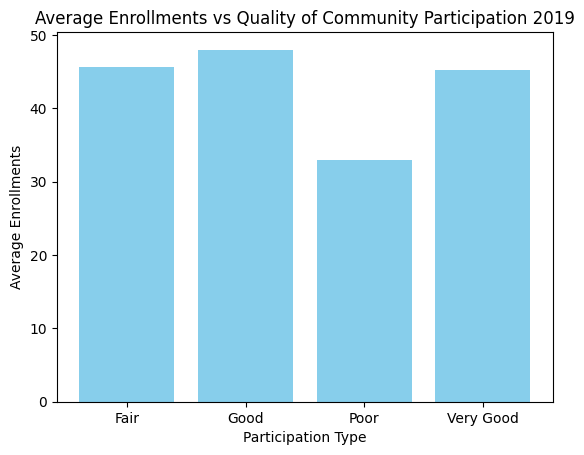

In [105]:
column = 'Enrolment, Transition Completion/Current Enrolment/group_xm3np02_p1enrolment/<span style="display:none">p1enrolment-Total</span>'
# mean enrolments based on community support
fair_mean = fair_participation[column].mean()
good_mean = good_participation[column].mean()
poor_mean = poor_participation[column].mean()
very_good_mean = very_good_participation[column].mean()

participation_means = {
    'Fair': fair_mean,
    'Good': good_mean,
    'Poor': poor_mean,
    'Very Good': very_good_mean
}

plt.bar(participation_means.keys(), participation_means.values(), color='skyblue')

plt.title('Average Enrollments vs Quality of Community Participation 2019')
plt.xlabel('Participation Type')
plt.ylabel('Average Enrollments')

# Show the plot
plt.show()

In [106]:
df['Community support to and participation in school life/Evaluate the level of community support to teachers'].value_counts()

Community support to and participation in school life/Evaluate the level of community support to teachers
GOOD –Some community members are willing to provide basic facilities to non –native teachers, but teachers still have inadequate means              33
FAIR – Community is aware of issues facing teachers (accommodation, water and firewood in     remote areas) but do not provide support              27
POOR – Community is uninterested in teachers of the issues facing them                                                                              18
VERY GOOD – Community actively plans for and meets the needs of non-native teachers to enable them to perform their duties in school effectively     2
Name: count, dtype: int64

In [107]:
starting_numbers = 'Enrolment, Transition Completion/Completion Rate for those who just completed P6/group_ot5cp50_total/<span style="display:none">total-Cohort enrolled in P1 (2011/2012) Boys</span>'
end_numbers = 'Enrolment, Transition Completion/Completion Rate for those who just completed P6/group_ot5cp50_total/<span style="display:none">total-completed P6  in 2017/2018 (Boys)</span>'

In [108]:
def completion_rates(given_df):
    completion_rate = ((given_df[end_numbers] - given_df[starting_numbers]) / given_df[starting_numbers])
    completion_rate.replace([np.inf, -np.inf], np.nan, inplace=True)
    completion_rate_cleaned = completion_rate.dropna()
    
    return completion_rate_cleaned


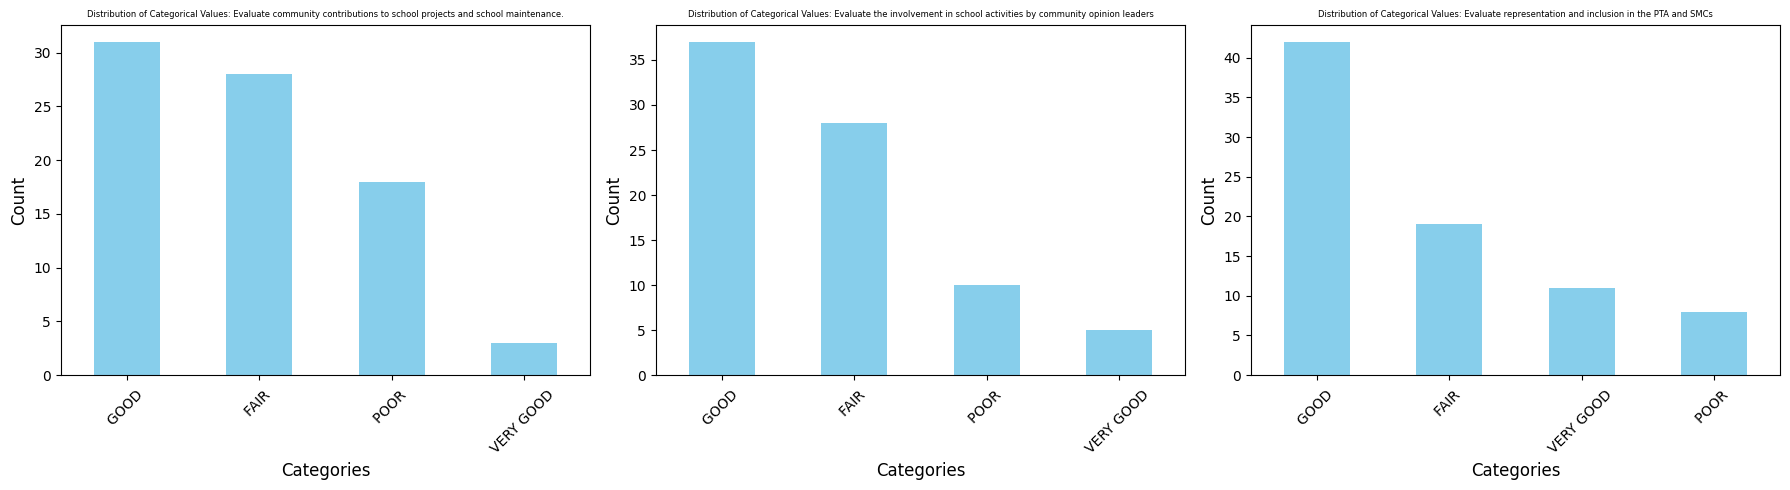

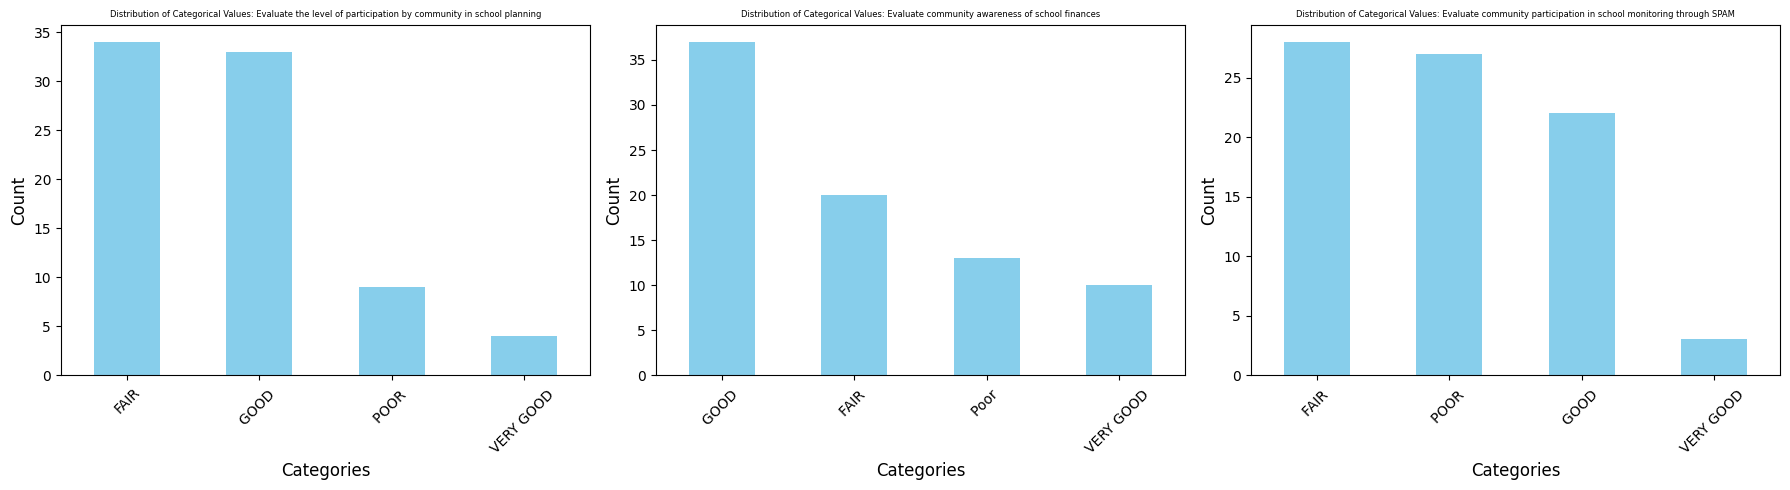

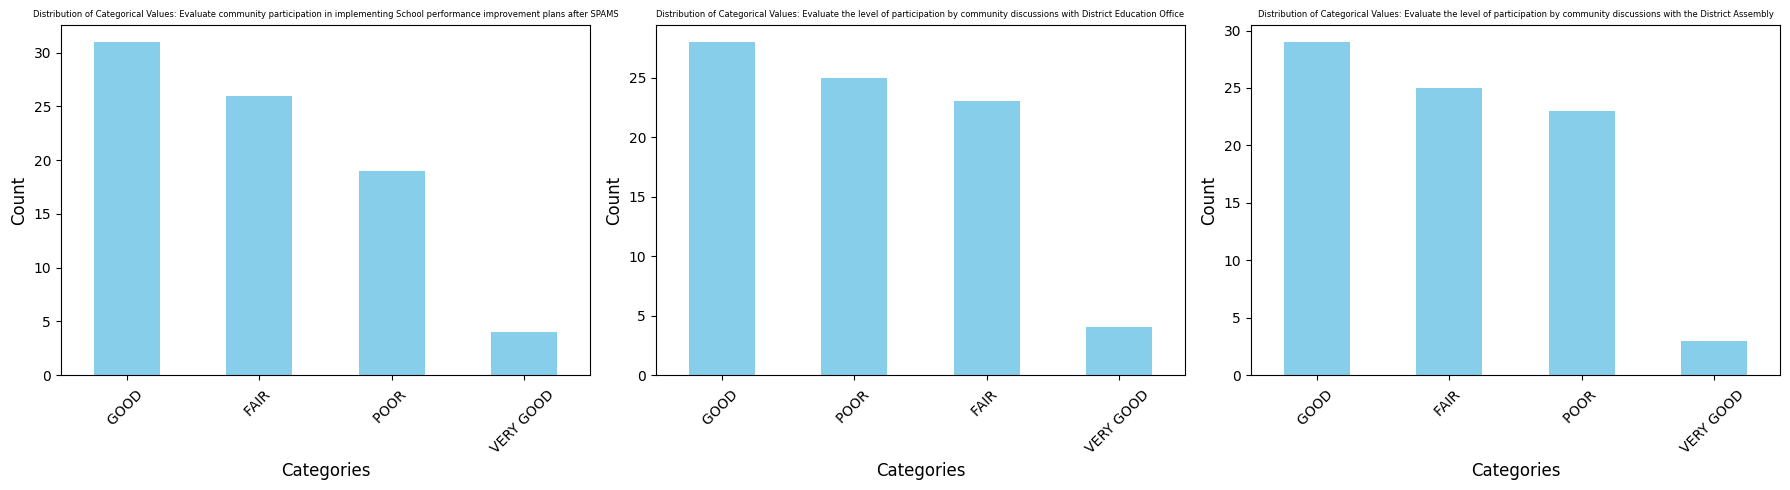

In [109]:
# data transformation
import time
cols = [
'Community support to and participation in school life/Evaluate community contributions to school projects and school maintenance.',
    'Community support to and participation in school life/Evaluate the involvement in school activities by community opinion leaders',
    'Community holding the school to account/Evaluate representation and inclusion in the PTA and SMCs',
    'Community holding the school to account/Evaluate the level of participation by community in school planning',
    'Community holding the school to account/Evaluate community awareness of school finances',
    'Community holding the school to account/Evaluate community participation in school monitoring through SPAM/scorecard process.',
    'Community holding the school to account/Evaluate community participation in implementing School performance improvement plans after SPAMS',
    'Community holding the school to account/Evaluate the level of participation by community discussions with District Education Office',
    'Community holding the school to account/Evaluate the level of participation by community discussions with the District Assembly'
]

for col in cols:
    df[col] = df[col].astype(str).apply(lambda x: (x.split('–')[0]))
    df[col] = df[col].astype(str).apply(lambda x: (x.split('-')[0]))
    

num_cols_per_row = 3  


for i in range(0, len(cols), num_cols_per_row):
    num_plots = min(num_cols_per_row, len(cols) - i)
    
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 6, 5))
    
    if num_plots == 1:
        axes = [axes]
    
    for j, col in enumerate(cols[i:i + num_cols_per_row]):
        df[col].value_counts().plot(kind='bar', color='skyblue', ax=axes[j])
        
        axes[j].set_title(f"Distribution of Categorical Values: {col.split('/')[1]}", fontsize=6)
        axes[j].set_xlabel('Categories', fontsize=12)
        axes[j].set_ylabel('Count', fontsize=12)
        axes[j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

In [110]:
s_map = {'GOOD':0.75, 'GOOD ':0.75, 'VERY GOOD ':1.5, 'Poor ':-1.5, 'FAIR':0, 'VERY GOOD':1.5, 'POOR':-1.5, 'FAIR ':0, 'POOR ': -1.5}
for col in cols:
    df[col] = df[col].apply(lambda x: s_map[x])

In [112]:
df['Aggregated Measure'] = df[cols].sum(axis=1)


In [115]:
df['Aggregated Measure'] = df['Aggregated Measure'].apply(lambda x: 'involved' if x >= 0 else 'not involved')

In [117]:
df['Aggregated Measure']

Aggregated Measure
involved        51
not involved    29
Name: count, dtype: int64

In [118]:
involved_df = df[df['Aggregated Measure'] == 'involved']
uninvolved_df = df[df['Aggregated Measure'] == 'not involved']

In [125]:
involvement_completionRates = 1 + completion_rates(involved_df).mean()
uninvolved_completionRates = 1 + completion_rates(uninvolved_df).mean()

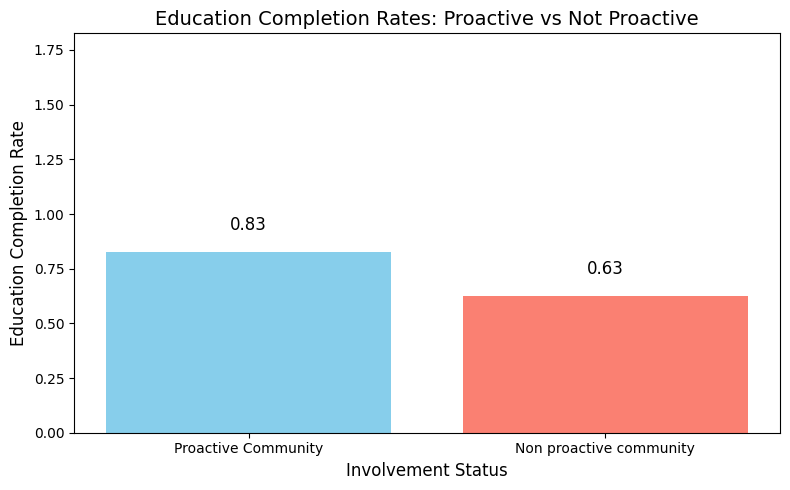

In [129]:
labels = ['Proactive Community', 'Non proactive community']
values = [involvement_completionRates, uninvolved_completionRates]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Education Completion Rates: Proactive vs Not Proactive', fontsize=14)
plt.xlabel('Involvement Status', fontsize=12)
plt.ylabel('Education Completion Rate', fontsize=12)
plt.ylim(0, max(values) + 1)  # Set y-axis limit for better visibility

# Optional: Add data labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()